## Compare the turnstyle entries in the new york city, especially the stations in the low income communities for the months of March, April, May 2020.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
engine = create_engine('sqlite:///mta_data.db')


In [3]:
df_mar_2020 = pd.read_sql("SELECT * from mta_data WHERE DATE LIKE '03/%/2020';", engine)
df_mar_2020.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/28/2020,00:00:00,REGULAR,7412829,2516511
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/28/2020,04:00:00,REGULAR,7412831,2516512
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/28/2020,08:00:00,REGULAR,7412837,2516526
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/28/2020,12:00:00,REGULAR,7412849,2516538
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/28/2020,16:00:00,REGULAR,7412880,2516555


In [4]:
df_apr_2020 = pd.read_sql("SELECT * from mta_data WHERE DATE LIKE '04/%/2020';", engine)
df_apr_2020.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/25/2020,00:00:00,REGULAR,7415454,2518022
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/25/2020,04:00:00,REGULAR,7415454,2518022
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/25/2020,08:00:00,REGULAR,7415459,2518033
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/25/2020,12:00:00,REGULAR,7415468,2518044
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/25/2020,16:00:00,REGULAR,7415480,2518056


In [5]:
df_may_2020 = pd.read_sql("SELECT * from mta_data WHERE DATE LIKE '05/%/2020';", engine)
df_may_2020.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553


In [6]:
df = pd.concat([df_mar_2020, df_apr_2020, df_may_2020], ignore_index=True)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/28/2020,00:00:00,REGULAR,7412829,2516511
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/28/2020,04:00:00,REGULAR,7412831,2516512
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/28/2020,08:00:00,REGULAR,7412837,2516526
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/28/2020,12:00:00,REGULAR,7412849,2516538
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/28/2020,16:00:00,REGULAR,7412880,2516555


In [7]:
df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
2716349,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/01/2020,05:00:00,REGULAR,5554,514
2716350,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/01/2020,09:00:00,REGULAR,5554,514
2716351,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/01/2020,13:00:00,REGULAR,5554,514
2716352,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/01/2020,17:00:00,REGULAR,5554,514
2716353,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/01/2020,21:00:00,REGULAR,5554,514


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716354 entries, 0 to 2716353
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 228.0+ MB


## Cleaning the data

In [9]:
df.columns = [col.strip() for col in df.columns]
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [10]:
# check and delete rows with null values if any
df.loc[df.isna().sum()]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/28/2020,00:00:00,REGULAR,7412829,2516511
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/28/2020,00:00:00,REGULAR,7412829,2516511
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/28/2020,00:00:00,REGULAR,7412829,2516511
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/28/2020,00:00:00,REGULAR,7412829,2516511
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/28/2020,00:00:00,REGULAR,7412829,2516511
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/28/2020,00:00:00,REGULAR,7412829,2516511
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/28/2020,00:00:00,REGULAR,7412829,2516511
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/28/2020,00:00:00,REGULAR,7412829,2516511
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/28/2020,00:00:00,REGULAR,7412829,2516511
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/28/2020,00:00:00,REGULAR,7412829,2516511


In [11]:
# delete rows with values zero
df.loc[df['ENTRIES']==0]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
240,A002,R051,02-05-01,59 ST,NQR456W,BMT,03/28/2020,00:00:00,REGULAR,0,863
241,A002,R051,02-05-01,59 ST,NQR456W,BMT,03/28/2020,04:00:00,REGULAR,0,863
242,A002,R051,02-05-01,59 ST,NQR456W,BMT,03/28/2020,08:00:00,REGULAR,0,863
243,A002,R051,02-05-01,59 ST,NQR456W,BMT,03/28/2020,12:00:00,REGULAR,0,863
244,A002,R051,02-05-01,59 ST,NQR456W,BMT,03/28/2020,16:00:00,REGULAR,0,863
...,...,...,...,...,...,...,...,...,...,...,...
2715911,R645,R110,00-05-01,FLATBUSH AV-B.C,25,IRT,05/01/2020,05:00:00,REGULAR,0,417
2715912,R645,R110,00-05-01,FLATBUSH AV-B.C,25,IRT,05/01/2020,09:00:00,REGULAR,0,417
2715913,R645,R110,00-05-01,FLATBUSH AV-B.C,25,IRT,05/01/2020,13:00:00,REGULAR,0,417
2715914,R645,R110,00-05-01,FLATBUSH AV-B.C,25,IRT,05/01/2020,17:00:00,REGULAR,0,417


In [12]:
df.drop(df.loc[df['ENTRIES']==0].index, inplace=True)

Check if rows with zero value are deleted from the dataframe

In [13]:
df.loc[df['ENTRIES']==0]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS


The date and time datatypes are string, let's convert date to datetime and form a new column by combining date and time.

In [14]:
import datetime
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [15]:
# convert date to datetime type
df["DATE"] = pd.to_datetime(df.DATE)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2675845 entries, 0 to 2716353
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       datetime64[ns]
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  DATE_TIME  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 265.4+ MB


## Delete duplicate rows

In [17]:
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
859952,N120A,R153,01-00-00,UTICA AV,2020-04-17 05:00:00,2
424315,H009,R235,00-03-00,BEDFORD AV,2020-03-22 12:00:00,2
501259,J009,R378,00-00-01,MYRTLE AV,2020-05-27 05:00:00,2
0,A002,R051,02-00-00,59 ST,2020-03-01 03:00:00,1
1783898,R142,R293,01-00-01,34 ST-PENN STA,2020-04-29 22:00:00,1


In [18]:
# delete duplicate rows
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

Check if duplicate values have been deleted

In [19]:
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-03-01 03:00:00,1
1783908,R142,R293,01-00-01,34 ST-PENN STA,2020-05-01 14:00:00,1
1783890,R142,R293,01-00-01,34 ST-PENN STA,2020-04-28 14:00:00,1
1783891,R142,R293,01-00-01,34 ST-PENN STA,2020-04-28 18:00:00,1
1783892,R142,R293,01-00-01,34 ST-PENN STA,2020-04-28 22:00:00,1


Check the column DESC and the values.

In [20]:
df.DESC.value_counts()

REGULAR       2666467
RECOVR AUD       9375
Name: DESC, dtype: int64

In [21]:
df = df.drop(["DESC"], axis=1, errors="ignore")

Each combination of C/A, UNIT, SCP, and STATION represents a unique turnstile. Let's take a look at one specific turnstile on a specific date. What does each row in the dataframe represent? Obtain the maximum ENTRIES value for each day, for each unique turnstile.

In [22]:
df[(df["C/A"] == "A002") & 
(df["UNIT"] == "R051") & 
(df["SCP"] == "02-00-00") & 
(df["STATION"] == "59 ST") &
(df["DATE"] == "04/25/2020")]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
912499,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-25,20:00:00,7415500,2518064,2020-04-25 20:00:00
912498,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-25,16:00:00,7415480,2518056,2020-04-25 16:00:00
912497,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-25,12:00:00,7415468,2518044,2020-04-25 12:00:00
912496,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-25,08:00:00,7415459,2518033,2020-04-25 08:00:00
912495,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-25,04:00:00,7415454,2518022,2020-04-25 04:00:00
912494,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-04-25,00:00:00,7415454,2518022,2020-04-25 00:00:00


In [23]:
df_daily = df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False).ENTRIES.max()

In [24]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-03-01,7396077
1,A002,R051,02-00-00,59 ST,2020-03-02,7397350
2,A002,R051,02-00-00,59 ST,2020-03-03,7398638
3,A002,R051,02-00-00,59 ST,2020-03-04,7399918
4,A002,R051,02-00-00,59 ST,2020-03-05,7401196


Calculate the daily entries i.e the number of people traveling on each day. Group the data by turnstile and use the Pandas .apply() method to compute the same differencing function for each turnstile.

In [25]:
df_daily[["PREV_DATE", "PREV_ENTRIES"]] = (df_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))

<ipython-input-25-9adb94d454ec>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_daily[["PREV_DATE", "PREV_ENTRIES"]] = (df_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))


In [26]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,2020-03-01,7396077,NaT,NaN
1,A002,R051,02-00-00,59 ST,2020-03-02,7397350,2020-03-01,7396077.0
2,A002,R051,02-00-00,59 ST,2020-03-03,7398638,2020-03-02,7397350.0
3,A002,R051,02-00-00,59 ST,2020-03-04,7399918,2020-03-03,7398638.0
4,A002,R051,02-00-00,59 ST,2020-03-05,7401196,2020-03-04,7399918.0


In [27]:
df_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

## Reverse Entries
Let's look at some more weirdness in the data and think about handling it before we finalize our daily count column

In [28]:
df_daily[df_daily["ENTRIES"] < df_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1392,A006,R079,00-00-04,5 AV/59 ST,2020-04-14,49,2020-04-13,7896805.0
1450,A006,R079,00-03-00,5 AV/59 ST,2020-03-11,939,2020-03-10,9438081.0
2122,A007,R079,01-06-03,5 AV/59 ST,2020-04-08,22,2020-04-07,7832211.0
3373,A011,R080,01-03-00,57 ST-7 AV,2020-03-02,885683419,2020-03-01,885683750.0
3374,A011,R080,01-03-00,57 ST-7 AV,2020-03-03,885682308,2020-03-02,885683419.0


Let's check for one particular turnstyle, the reverse counter

In [29]:
mask = ((df["C/A"] == "A011") & 
(df["UNIT"] == "R080") & 
(df["SCP"] == "01-00-00") & 
(df["STATION"] == "57 ST-7 AV") &
(df["DATE_TIME"].dt.date == datetime.datetime(2020, 4, 27).date()))

df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
913735,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,2020-04-27,20:00:00,457030,1590736,2020-04-27 20:00:00
913734,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,2020-04-27,16:00:00,457023,1590725,2020-04-27 16:00:00
913733,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,2020-04-27,12:00:00,457010,1590718,2020-04-27 12:00:00
913732,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,2020-04-27,08:00:00,457006,1590712,2020-04-27 08:00:00
913731,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,2020-04-27,04:00:00,457004,1590700,2020-04-27 04:00:00


Let's see how many stations have this problem

In [30]:
(df_daily[df_daily["ENTRIES"] < df_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION        
A006   R079  00-00-04  5 AV/59 ST          1
             00-03-00  5 AV/59 ST          1
A007   R079  01-06-03  5 AV/59 ST          1
A011   R080  01-03-00  57 ST-7 AV         91
             01-03-02  57 ST-7 AV          1
                                          ..
R610   R057  00-04-04  ATL AV-BARCLAY      1
             00-04-05  ATL AV-BARCLAY      1
R622   R123  00-00-00  FRANKLIN AV        71
R730   R431  00-00-04  EASTCHSTER/DYRE    90
TRAM1  R468  00-00-01  RIT-MANHATTAN       1
Length: 183, dtype: int64

In [31]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
df_daily["DAILY_ENTRIES"] = df_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

49 7896805.0
939 9438081.0
22 7832211.0
62 1562921352.0
28448967 5273374.0
5279116 28448967.0
28135572 13795187.0
13803689 28135572.0
16141430 14845766.0
14853487 16141430.0
67822764 11523064.0
11528476 67822764.0
13 6777431.0
221 8235039.0
36 5675074.0
25 8800439.0
475958749 7480530.0
230 955727806.0
19676995 17126295.0
17126319 19676995.0
15065838 17126282.0
25525735 15065804.0
12309516 25525671.0
1113 1101917.0
148 2635417.0
304 3571855.0
21 2090862.0
311 168628048.0
51 4733633.0
83886080 655360.0
2935583 81029.0
321184286 5646398.0
307624726 321184286.0
363 1317615.0
233 2407277.0
56 1937131.0
8368358 1822637.0
577757 2819474.0
54 9046801.0
308 1516981.0
1627393907 6366854.0
126 1224795435.0
30 10444603.0
2148 12445710.0
7948173 492715.0
492823 7948173.0
5181972 1987199.0
1987598 5181972.0
30 1634879.0
414777508 349287.0
2043281611 4685084.0
46 3366642.0
1954 10443707.0
524392 120318011.0
2696 1366086.0
909 3583402.0
569321681 16784233.0
1840 7554030.0
1873 1775753.0
1137 11047721.

In [32]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2020-03-02,7397350,2020-03-01,7396077.0,1273.0
2,A002,R051,02-00-00,59 ST,2020-03-03,7398638,2020-03-02,7397350.0,1288.0
3,A002,R051,02-00-00,59 ST,2020-03-04,7399918,2020-03-03,7398638.0,1280.0
4,A002,R051,02-00-00,59 ST,2020-03-05,7401196,2020-03-04,7399918.0,1278.0
5,A002,R051,02-00-00,59 ST,2020-03-06,7402441,2020-03-05,7401196.0,1245.0


So far we've been operating on a single turnstile level. Now let's combine turnstiles that fall within the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstiles -- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together. For each ControlArea/UNIT/STATION combo, for each day, sum the counts from each turnstile belonging to that combo.

In [33]:
ca_unit_station_daily = df_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,2020-03-02,11966.0
1,A002,R051,59 ST,2020-03-03,11990.0
2,A002,R051,59 ST,2020-03-04,12467.0
3,A002,R051,59 ST,2020-03-05,12186.0
4,A002,R051,59 ST,2020-03-06,12034.0


In [34]:
ca_unit_station_daily_sum = ca_unit_station_daily.groupby("DATE")["DAILY_ENTRIES"].mean().reset_index()
ca_unit_station_daily_sum.head()

,DATE,DAILY_ENTRIES
0,2020-03-02,7481.760753
1,2020-03-03,10447.150538
2,2020-03-04,11116.229839
3,2020-03-05,11042.212366
4,2020-03-06,8124.127517


Below is the daily traffic for the months of Apr, May, June for the year 2020. We can see the daily traffic is increasing slowly as compared to the beginning of April, 2020.

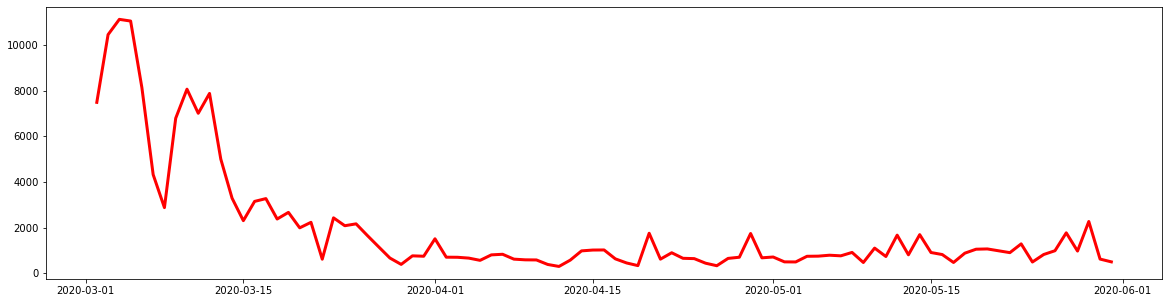

In [35]:
plt.figure(figsize=(20, 5))
plt.plot(ca_unit_station_daily_sum.DATE, ca_unit_station_daily_sum.DAILY_ENTRIES, color='red', linewidth=3)

## Calculate the daily entries for the month of March 2020

In [36]:
df_mar_2020_daily = ca_unit_station_daily.loc[(ca_unit_station_daily['DATE'].dt.month == 3) & (ca_unit_station_daily["DATE"].dt.year==2020)][["STATION", "DATE", "DAILY_ENTRIES"]]
df_mar_2020_daily

,STATION,DATE,DAILY_ENTRIES
0,59 ST,2020-03-02,11966.0
1,59 ST,2020-03-03,11990.0
2,59 ST,2020-03-04,12467.0
3,59 ST,2020-03-05,12186.0
4,59 ST,2020-03-06,12034.0
...,...,...,...
67743,RIT-ROOSEVELT,2020-03-27,474.0
67744,RIT-ROOSEVELT,2020-03-28,277.0
67745,RIT-ROOSEVELT,2020-03-29,240.0
67746,RIT-ROOSEVELT,2020-03-30,377.0


In [37]:
station_daily_mar_2020 = df_mar_2020_daily.groupby(["STATION"])[['DAILY_ENTRIES']].sum().reset_index().sort_values('DAILY_ENTRIES', ascending=False)
station_daily_mar_2020

,STATION,DAILY_ENTRIES
59,34 ST-HERALD SQ,5225468.0
61,34 ST-PENN STA,3011962.0
110,86 ST,2199564.0
68,42 ST-PORT AUTH,1964637.0
46,23 ST,1932309.0
...,...,...
147,BEACH 90 ST,11469.0
332,ROCKAWAY PARK B,11315.0
148,BEACH 98 ST,6855.0
162,BROAD CHANNEL,4308.0


<BarContainer object of 5 artists>

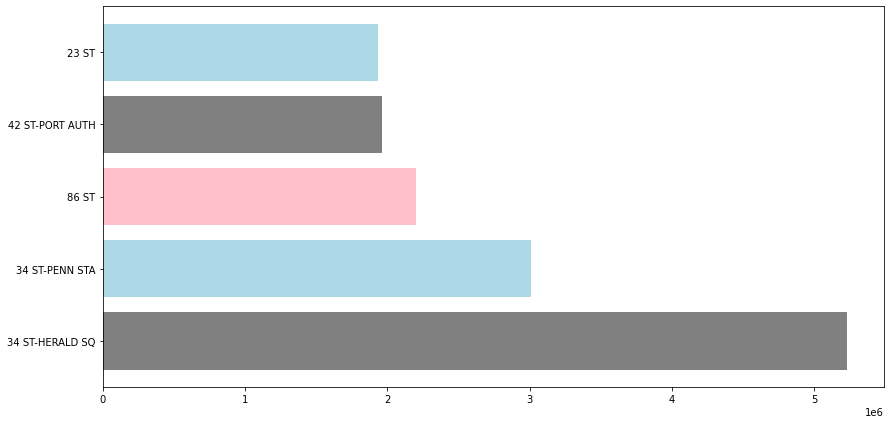

In [38]:
x = ['34 ST-HERALD SQ', '34 ST-PENN STA', '86 ST', '42 ST-PORT AUTH', '23 ST']
y = [5225468.0, 3011962.0, 2199564.0, 1964637.0, 1932309.0]

plt.figure(figsize=(14, 7))
plt.barh(x, y, color=['grey', 'lightblue', 'pink'])

In [39]:
# stations for brooklyn,bronx and queens boroughs
station_names_mar_2020 = ['BROOK AV', '183 ST', '167 ST', 'TREMONT AV', 'FORDHAM RD', '30 AV', 'QUEENS PLAZA', 'JAMAICA CENTER', 'BRONX PARK EAST', 'BROADWAY', 'MYRTLE AV', 'CARROLL ST', 'DEKALB AV', 'KINGS HWY', 'FLUSHING AV', 'BEDFORD AV', 'CHURCH AV', 'CROWN HTS-UTICA', 'KNICKERBOCKER', 'MORGAN AV', 'NEVINS ST', 'NOSTRAND AV']
daily_totals_mar_2020 = {} 

for i in station_names_mar_2020:
  stations = (station_daily_mar_2020.loc[station_daily_mar_2020["STATION"]==i, "DAILY_ENTRIES"])
  daily_totals_mar_2020[stations.item()] = i


sorted_daily_totals_mar_2020 = {}

for key in sorted(daily_totals_mar_2020, reverse=True):
    sorted_daily_totals_mar_2020[key] = daily_totals_mar_2020[key]
    
sorted_daily_totals_mar_2020

{557766.0: 'JAMAICA CENTER',
 545008.0: 'CHURCH AV',
 492060.0: 'CARROLL ST',
 442611.0: 'DEKALB AV',
 420260.0: 'CROWN HTS-UTICA',
 417048.0: 'KINGS HWY',
 363093.0: 'FORDHAM RD',
 302927.0: '167 ST',
 294968.0: 'NOSTRAND AV',
 282362.0: 'BEDFORD AV',
 241386.0: 'BROADWAY',
 194285.0: '30 AV',
 192535.0: 'QUEENS PLAZA',
 188976.0: 'FLUSHING AV',
 183996.0: 'MYRTLE AV',
 162128.0: 'TREMONT AV',
 145963.0: 'NEVINS ST',
 102255.0: 'BROOK AV',
 100427.0: '183 ST',
 88850.0: 'MORGAN AV',
 77478.0: 'KNICKERBOCKER',
 41639.0: 'BRONX PARK EAST'}

In [40]:
# stations for manhattan residential areas
station_names_2020 = ['96 ST', '72 ST', '34 ST-PENN STA','GRD CNTRL-42 ST', '191 ST',  '34 ST-HUDSON YD']
daily_totals_2020 = {} 

for i in station_names_2020:
  stations = (station_daily_mar_2020.loc[station_daily_mar_2020["STATION"]==i, "DAILY_ENTRIES"])
  daily_totals_2020[stations.item()] = i

# daily_totals_apr_2020

sorted_daily_totals_2020 = {}

for key in sorted(daily_totals_2020, reverse=True):
    sorted_daily_totals_2020[key] = daily_totals_2020[key]
    
sorted_daily_totals_2020

{3011962.0: '34 ST-PENN STA',
 1508120.0: 'GRD CNTRL-42 ST',
 817486.0: '96 ST',
 567497.0: '72 ST',
 216405.0: '34 ST-HUDSON YD',
 23186.0: '191 ST'}

<BarContainer object of 2 artists>

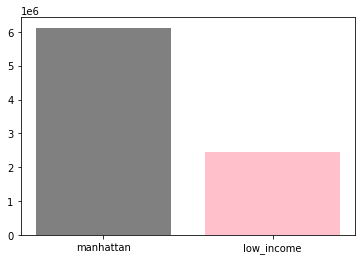

In [41]:
manhattan = 3011962.0+1508120.0+817486.0+567497.0+216405.0
# brooklyn,bronx and queens
low_income = 557766.0+545008.0+492060.0+442611.0+420260.0

plt.bar(['manhattan', 'low_income'], [manhattan, low_income], color=['grey', 'pink'])

## Calculate the daily entries for the month of April 2020

In [42]:
df_apr_2020_daily = ca_unit_station_daily.loc[(ca_unit_station_daily['DATE'].dt.month == 4) & (ca_unit_station_daily["DATE"].dt.year==2020)][["STATION", "DATE", "DAILY_ENTRIES"]]
df_apr_2020_daily

,STATION,DATE,DAILY_ENTRIES
30,59 ST,2020-04-01,1156.0
31,59 ST,2020-04-02,1135.0
32,59 ST,2020-04-03,1112.0
33,59 ST,2020-04-04,743.0
34,59 ST,2020-04-05,610.0
...,...,...,...
67773,RIT-ROOSEVELT,2020-04-26,234.0
67774,RIT-ROOSEVELT,2020-04-27,363.0
67775,RIT-ROOSEVELT,2020-04-28,575.0
67776,RIT-ROOSEVELT,2020-04-29,404.0


In [43]:
station_daily_apr_2020 = df_apr_2020_daily.groupby(["STATION"])[['DAILY_ENTRIES']].sum().reset_index().sort_values('DAILY_ENTRIES', ascending=False)
station_daily_apr_2020
# manhattan

,STATION,DAILY_ENTRIES
107,81 ST-MUSEUM,851401.0
0,1 AV,818120.0
258,JOURNAL SQUARE,676236.0
212,EUCLID AV,626735.0
70,46 ST,359025.0
...,...,...
162,BROAD CHANNEL,939.0
141,BEACH 105 ST,582.0
121,AQUEDUCT RACETR,505.0
350,THIRTY ST,212.0


In [44]:
station_daily_apr_2020.loc[station_daily_apr_2020["STATION"]=="81 ST-MUSEUM", "DAILY_ENTRIES"]

107    851401.0
Name: DAILY_ENTRIES, dtype: float64

In [45]:
stations = sorted(station_daily_apr_2020["STATION"])
stations

['1 AV',
 '103 ST',
 '103 ST-CORONA',
 '104 ST',
 '110 ST',
 '111 ST',
 '116 ST',
 '116 ST-COLUMBIA',
 '121 ST',
 '125 ST',
 '135 ST',
 '137 ST CITY COL',
 '138/GRAND CONC',
 '14 ST',
 '14 ST-UNION SQ',
 '145 ST',
 '149/GRAND CONC',
 '14TH STREET',
 '15 ST-PROSPECT',
 '155 ST',
 '157 ST',
 '161/YANKEE STAD',
 '163 ST-AMSTERDM',
 '167 ST',
 '168 ST',
 '169 ST',
 '170 ST',
 '174 ST',
 '174-175 STS',
 '175 ST',
 '176 ST',
 '18 AV',
 '18 ST',
 '181 ST',
 '182-183 STS',
 '183 ST',
 '190 ST',
 '191 ST',
 '2 AV',
 '20 AV',
 '207 ST',
 '21 ST',
 '21 ST-QNSBRIDGE',
 '215 ST',
 '219 ST',
 '225 ST',
 '23 ST',
 '231 ST',
 '233 ST',
 '238 ST',
 '25 AV',
 '25 ST',
 '28 ST',
 '3 AV',
 '3 AV 138 ST',
 '3 AV-149 ST',
 '30 AV',
 '33 ST',
 '33 ST-RAWSON ST',
 '34 ST-HERALD SQ',
 '34 ST-HUDSON YD',
 '34 ST-PENN STA',
 '36 AV',
 '36 ST',
 '39 AV',
 '4 AV-9 ST',
 '40 ST LOWERY ST',
 '42 ST-BRYANT PK',
 '42 ST-PORT AUTH',
 '45 ST',
 '46 ST',
 '46 ST BLISS ST',
 '47-50 STS ROCK',
 '49 ST',
 '4AV-9 ST',
 '5 AV

In [46]:
# stations for brooklyn and queens boroughs
station_names_apr_2020 = ['BROOK AV', '183 ST', '167 ST', 'TREMONT AV', 'FORDHAM RD', '30 AV', 'QUEENS PLAZA', 'JAMAICA CENTER', 'BRONX PARK EAST', 'BROADWAY', 'MYRTLE AV', 'CARROLL ST', 'DEKALB AV', 'KINGS HWY', 'FLUSHING AV', 'BEDFORD AV', 'CHURCH AV', 'CROWN HTS-UTICA', 'KNICKERBOCKER', 'MORGAN AV', 'NEVINS ST', 'NOSTRAND AV']
daily_totals_apr_2020 = {} 

for i in station_names_apr_2020:
  stations = (station_daily_apr_2020.loc[station_daily_apr_2020["STATION"]==i, "DAILY_ENTRIES"])
  daily_totals_apr_2020[stations.item()] = i

# daily_totals_apr_2020

sorted_daily_totals_apr_2020 = {}

for key in sorted(daily_totals_apr_2020, reverse=True):
    sorted_daily_totals_apr_2020[key] = daily_totals_apr_2020[key]
    
sorted_daily_totals_apr_2020

{145713.0: 'JAMAICA CENTER',
 132870.0: 'CHURCH AV',
 129177.0: 'CROWN HTS-UTICA',
 99925.0: 'FORDHAM RD',
 94034.0: '167 ST',
 78252.0: 'KINGS HWY',
 74445.0: 'DEKALB AV',
 64685.0: 'NOSTRAND AV',
 48577.0: 'FLUSHING AV',
 47040.0: 'TREMONT AV',
 36629.0: 'MYRTLE AV',
 36260.0: 'BROADWAY',
 34043.0: '183 ST',
 32652.0: 'NEVINS ST',
 32361.0: 'BROOK AV',
 27330.0: '30 AV',
 26048.0: 'BEDFORD AV',
 22182.0: 'QUEENS PLAZA',
 15353.0: 'CARROLL ST',
 13795.0: 'KNICKERBOCKER',
 13775.0: 'MORGAN AV',
 10251.0: 'BRONX PARK EAST'}

In [47]:
# stations for manhattan residential areas
station_names_2020 = ['96 ST', '72 ST', '34 ST-PENN STA','GRD CNTRL-42 ST', '191 ST',  '34 ST-HUDSON YD']
daily_totals_2020 = {} 

for i in station_names_2020:
  stations = (station_daily_apr_2020.loc[station_daily_apr_2020["STATION"]==i, "DAILY_ENTRIES"])
  daily_totals_2020[stations.item()] = i

# daily_totals_apr_2020

sorted_daily_totals_2020 = {}

for key in sorted(daily_totals_2020, reverse=True):
    sorted_daily_totals_2020[key] = daily_totals_2020[key]
    
sorted_daily_totals_2020

{194769.0: '34 ST-PENN STA',
 156188.0: '96 ST',
 136046.0: 'GRD CNTRL-42 ST',
 76607.0: '72 ST',
 24260.0: '34 ST-HUDSON YD',
 4819.0: '191 ST'}

## Calculate the daily entries for the month of May 2020

In [48]:
df_may_2020_daily = ca_unit_station_daily.loc[(ca_unit_station_daily['DATE'].dt.month == 5) & (ca_unit_station_daily["DATE"].dt.year==2020)][["STATION", "DATE", "DAILY_ENTRIES"]]
df_may_2020_daily

,STATION,DATE,DAILY_ENTRIES
60,59 ST,2020-05-01,1148.0
61,59 ST,2020-05-02,799.0
62,59 ST,2020-05-03,628.0
63,59 ST,2020-05-04,1118.0
64,59 ST,2020-05-05,1197.0
...,...,...,...
67804,RIT-ROOSEVELT,2020-05-27,854.0
67805,RIT-ROOSEVELT,2020-05-28,755.0
67806,RIT-ROOSEVELT,2020-05-29,793.0
67807,RIT-ROOSEVELT,2020-05-30,963.0


In [49]:
station_daily_may_2020 = df_may_2020_daily.groupby(["STATION"])[['DAILY_ENTRIES']].sum().reset_index().sort_values('DAILY_ENTRIES', ascending=False)
station_daily_may_2020

,STATION,DAILY_ENTRIES
107,81 ST-MUSEUM,1302521.0
199,DEKALB AV,1115860.0
61,34 ST-PENN STA,919152.0
353,TIMES SQ-42 ST,675479.0
212,EUCLID AV,654047.0
...,...,...
162,BROAD CHANNEL,1108.0
300,NEWARK HM HE,927.0
121,AQUEDUCT RACETR,494.0
351,THIRTY ST,241.0


## Calculate the daily time series for each STATION, by adding up all the turnstiles in a station.

In [50]:
station_daily = df_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,2020-03-02,15110.0
1,1 AV,2020-03-03,15875.0
2,1 AV,2020-03-04,14664.0
3,1 AV,2020-03-05,16103.0
4,1 AV,2020-03-06,16437.0


Sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate.

In [51]:
station_totals = station_daily.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals.head(20)

,STATION,DAILY_ENTRIES
0,34 ST-HERALD SQ,5551702.0
1,34 ST-PENN STA,4125883.0
2,86 ST,2589627.0
3,42 ST-PORT AUTH,2399795.0
4,81 ST-MUSEUM,2288033.0
5,23 ST,2262244.0
6,PATH NEW WTC,1890876.0
7,TIMES SQ-42 ST,1848120.0
8,GRD CNTRL-42 ST,1817814.0
9,125 ST,1792609.0


<BarContainer object of 6 artists>

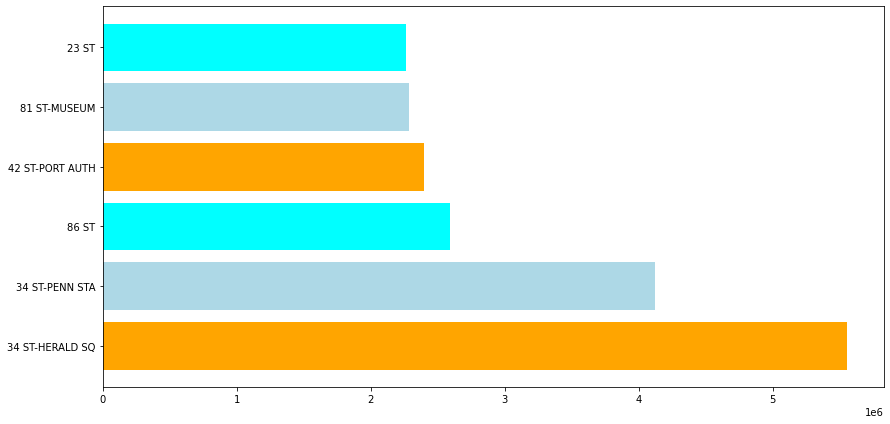

In [52]:
x = station_totals["STATION"][0:6]
y = station_totals["DAILY_ENTRIES"][0:6]

plt.figure(figsize=(14, 7))
plt.barh(x, y, color=['orange', 'lightblue', 'aqua'])

Above are the top 20 stations with the highest traffic. I will be exploring the top 5 stations traffic over the four months, post covid lockdown.

In [53]:
# # stations for manhattan residential areas
station_names_2020 = ['96 ST', '72 ST', '34 ST-PENN STA','GRD CNTRL-42 ST', '191 ST',  '34 ST-HUDSON YD']

daily_totals_2020 = {} 

for i in station_names_2020:
  stations = (station_totals.loc[station_totals["STATION"]==i, "DAILY_ENTRIES"])
  daily_totals_2020[stations.item()] = i

# daily_totals_apr_2020

sorted_daily_totals_2020 = {}

for key in sorted(daily_totals_2020, reverse=True):
    sorted_daily_totals_2020[key] = daily_totals_2020[key]
    
sorted_daily_totals_2020

{4125883.0: '34 ST-PENN STA',
 1817814.0: 'GRD CNTRL-42 ST',
 1162941.0: '96 ST',
 745492.0: '72 ST',
 273192.0: '34 ST-HUDSON YD',
 35514.0: '191 ST'}

<BarContainer object of 6 artists>

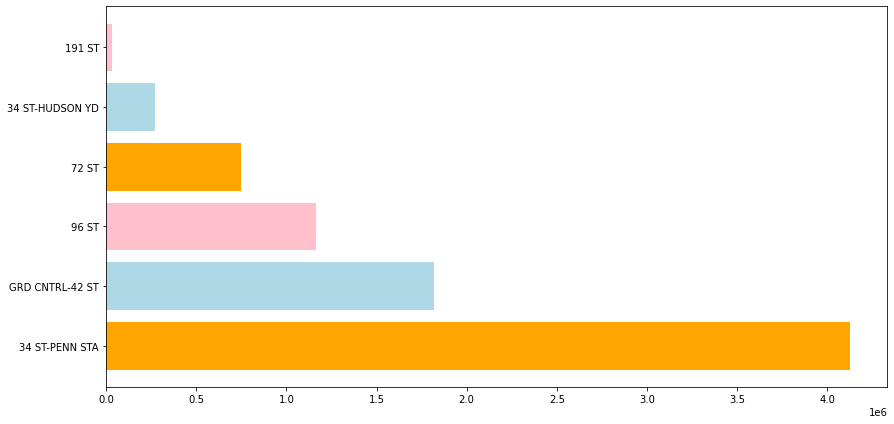

In [54]:
x = list(sorted_daily_totals_2020.values())[0:6]
y = list(sorted_daily_totals_2020.keys())[0:6]

plt.figure(figsize=(14, 7))
plt.barh(x, y, color=['orange', 'lightblue', 'pink'])

In [55]:
# stations for brooklyn, bronx and queens boroughs
station_names_2020_q = ['BROOK AV', '183 ST', '167 ST', 'TREMONT AV', 'FORDHAM RD', '30 AV', 'QUEENS PLAZA', 'JAMAICA CENTER', 'BRONX PARK EAST', 'BROADWAY', 'MYRTLE AV', 'CARROLL ST', 'DEKALB AV', 'KINGS HWY', 'FLUSHING AV', 'BEDFORD AV', 'CHURCH AV', 'CROWN HTS-UTICA', 'KNICKERBOCKER', 'MORGAN AV', 'NEVINS ST', 'NOSTRAND AV']
daily_totals_2020_q = {} 

for i in station_names_2020_q:
  stations = (station_totals.loc[station_totals["STATION"]==i, "DAILY_ENTRIES"])
  daily_totals_2020_q[stations.item()] = i

sorted_daily_totals_2020_q = {}

for key in sorted(daily_totals_2020_q, reverse=True):
    sorted_daily_totals_2020_q[key] = daily_totals_2020_q[key]
    
sorted_daily_totals_2020_q

    
#list(sorted_daily_totals_2020_q.keys())[0:6]

{1632916.0: 'DEKALB AV',
 876844.0: 'JAMAICA CENTER',
 848221.0: 'CHURCH AV',
 704055.0: 'CROWN HTS-UTICA',
 599301.0: 'KINGS HWY',
 589076.0: 'FORDHAM RD',
 527510.0: 'CARROLL ST',
 512519.0: '167 ST',
 437813.0: 'NOSTRAND AV',
 349106.0: 'BEDFORD AV',
 329065.0: 'BROADWAY',
 301784.0: 'FLUSHING AV',
 264784.0: 'MYRTLE AV',
 264777.0: 'TREMONT AV',
 259045.0: '30 AV',
 244728.0: 'QUEENS PLAZA',
 216879.0: 'NEVINS ST',
 177206.0: '183 ST',
 174048.0: 'BROOK AV',
 121218.0: 'MORGAN AV',
 110048.0: 'KNICKERBOCKER',
 64424.0: 'BRONX PARK EAST'}

<BarContainer object of 6 artists>

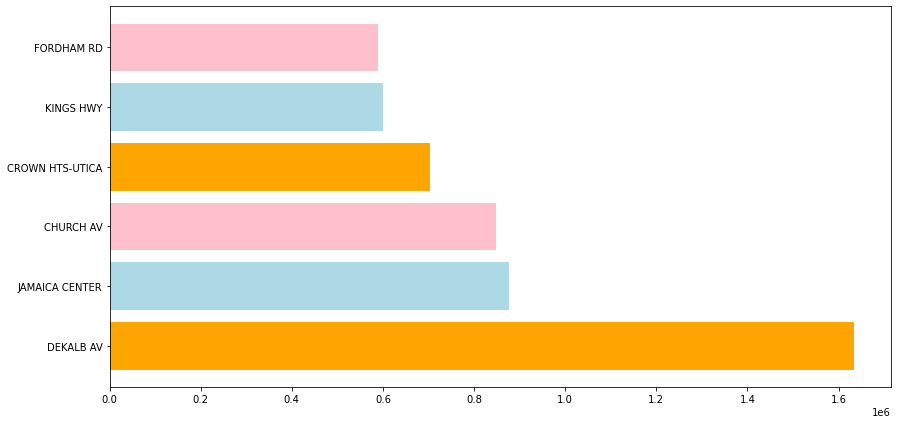

In [56]:
x = list(sorted_daily_totals_2020_q.values())[0:6]
y = list(sorted_daily_totals_2020_q.keys())[0:6]

plt.figure(figsize=(14, 7))
plt.barh(x, y, color=['orange', 'lightblue', 'pink'])